In [2]:
import gc
import glob
import geopandas as gpd

## .shp 파일 읽기

In [63]:
file_path = "./data/National_Entertainment_Establishment_Information/ETO_38_20221206_G_001.shp"
zip_path = glob.glob("./data/National_Entertainment_Establishment_Information//ETO_38_20221206_G_001.zip")

In [64]:
gdf = gpd.GeoDataFrame.from_file(file_path,encoding='utf-8')
gdf.head(3)

,seq,zip,lnno_adres,rdnmadr,rn_zip,entrprs_nm,la,lo,geometry
0,869,660040,경상남도 진주시 봉곡동 487-7,경상남도 진주시 창렬로 68 (봉곡동),52664,이월,35.1946,128.070,POINT (128.06956 35.19458)
1,399,638803,경상남도 고성군 고성읍 동외리 288-15,경상남도 고성군 고성읍 동외로 163-11,52942,해운대,34.9756,128.325,POINT (128.32547 34.97562)
2,439,660803,경상남도 진주시 상대동 180-30,경상남도 진주시 대신로 305 (상대동),52774,힐링,35.1878,128.117,POINT (128.11667 35.18777)


### 지도 shp 파일 column

geometry컬럼에 POLYGON(숫자,숫자,숫자,숫자)를 사용하여 지도를 그릴 수 있다.

In [79]:
kr_admin_district_file_path = "./data/korea_admin_districts/Dong/emd.shp"
kr_admin_district = gpd.read_file(kr_admin_district_file_path,encoding="CP949")
kr_admin_district.head(3)

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,11110101,Cheongun-dong,청운동,"POLYGON ((953700.022 1954605.065, 953693.871 1..."
1,11110102,Singyo-dong,신교동,"POLYGON ((953233.465 1953996.984, 953235.183 1..."
2,11110103,Gungjeong-dong,궁정동,"POLYGON ((953560.228 1954257.466, 953561.190 1..."


In [80]:
gwangjingu_list = ["군자동","능동","화양동", "구의동", "광장동","광진동", "자양동", "중곡동"]
gwangjingu = kr_admin_district[kr_admin_district['EMD_KOR_NM'].isin(gwangjingu_list)]

In [81]:
gwangjingu

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
214,11215101,Junggok-dong,중곡동,"POLYGON ((964825.058 1952633.250, 964875.565 1..."
215,11215102,Neung-dong,능동,"POLYGON ((963696.309 1950486.709, 963707.766 1..."
216,11215103,Guui-dong,구의동,"POLYGON ((962857.614 1949472.322, 962867.514 1..."
217,11215104,Gwangjang-dong,광장동,"POLYGON ((965895.926 1951078.721, 965879.493 1..."
218,11215105,Jayang-dong,자양동,"POLYGON ((962325.558 1948937.413, 962383.020 1..."
219,11215107,Hwayang-dong,화양동,"POLYGON ((962857.614 1949472.322, 962852.002 1..."
220,11215109,Gunja-dong,군자동,"POLYGON ((962412.658 1949833.640, 962412.375 1..."
1231,30110111,Jayang-dong,자양동,"POLYGON ((995828.854 1816421.192, 995842.817 1..."
1883,41390128,Gunja-dong,군자동,"POLYGON ((938279.303 1930197.485, 938285.240 1..."
2099,41590118,Neung-dong,능동,"POLYGON ((960906.208 1911317.755, 960906.550 1..."


In [82]:
import matplotlib.pyplot as plt

In [83]:
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams["figure.figsize"] = (10,10)

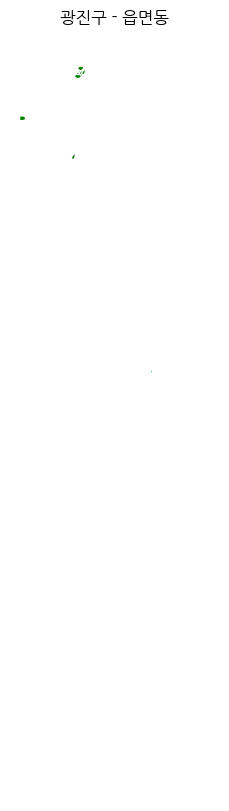

In [84]:
ax = gwangjingu.convex_hull.plot(color="green",edgecolor="w")
ax.set_title("광진구 - 읍면동")
ax.set_axis_off() # 축제거
plt.show()

In [73]:
kr_admin_district_file_path = "./data/korea_admin_districts/SiGunGu/sig.shp"
kr_admin_district = gpd.read_file(kr_admin_district_file_path,encoding="CP949")
kr_admin_district.head(3)

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1..."
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1..."


In [74]:
gwangjingu = kr_admin_district[kr_admin_district['SIG_KOR_NM']=="광진구"]
gwangjingu

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.058 1952633.250, 964875.565 1..."


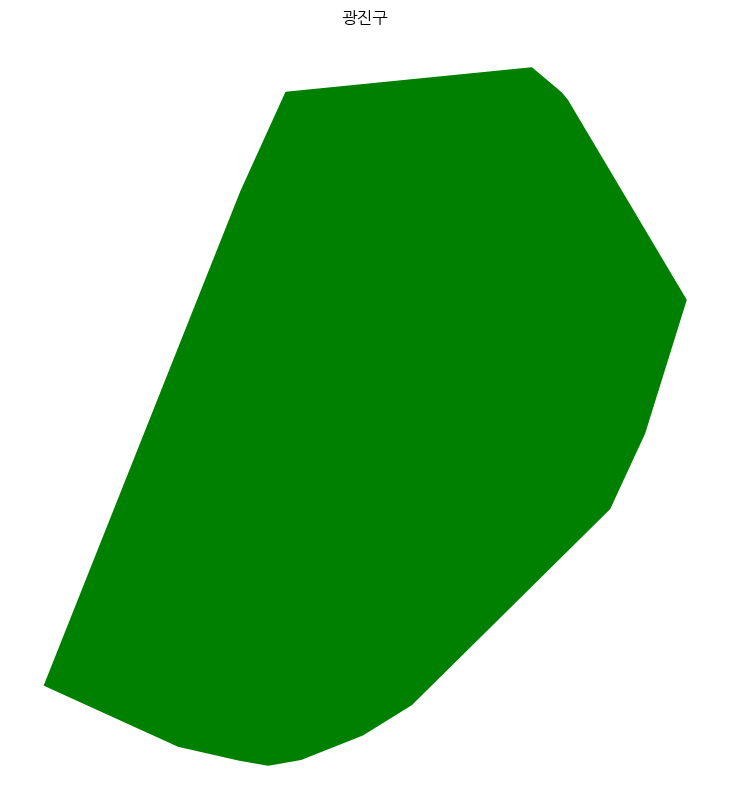

In [75]:
ax = gwangjingu.convex_hull.plot(color="green",edgecolor="w")
ax.set_title("광진구")
ax.set_axis_off() # 축제거
plt.show()

In [1]:
from shapely.geometry import Polygon

# 위도, 경도 좌표 리스트
coordinates = [(37.498205, 127.02758), (37.498205, 127.03758), (37.488205, 127.03758), (37.488205, 127.02758)]

# Polygon 객체 생성
polygon = Polygon(coordinates)

# 면적 계산
area = polygon.area
print(area)


0.00010000000000003127


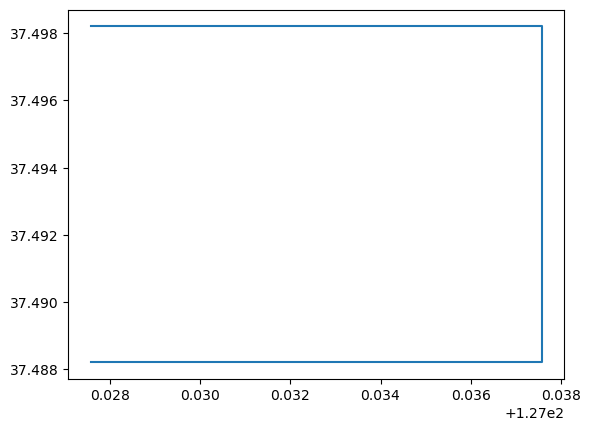

In [2]:
import matplotlib.pyplot as plt

# 위도, 경도 좌표 리스트
coordinates = [(37.498205, 127.02758), (37.498205, 127.03758), (37.488205, 127.03758), (37.488205, 127.02758)]

# 위도와 경도를 분리합니다.
lats, lons = zip(*coordinates)

# 좌표를 시각화합니다.
plt.figure()
plt.plot(lons, lats)
plt.show()


In [6]:
import random
from shapely.geometry import MultiPoint
import geopandas as gpd

# 무작위 위도, 경도 좌표 생성
coordinates = [(37.498205, 127.02758), (37.498205, 127.03758), (37.488205, 127.03758), (37.488205, 127.02758),
              (38.498205, 128.02758), (38.498205, 128.03758), (38.488205, 128.03758)]

# 다각형 생성
convex_hull = MultiPoint(coordinates).convex_hull

# 면적 계산
area = convex_hull.area

# 다각형 시각화
gdf = gpd.GeoDataFrame(index=[0], crs='EPSG:4326', geometry=[convex_hull])
gdf.plot()

# 위도와 경도를 분리합니다.
lats, lons = zip(*coordinates)

# 좌표를 시각화합니다.
plt.figure()
plt.plot(lons, lats)
plt.show()

ValueError: 'box_aspect' and 'fig_aspect' must be positive

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x00000271B04E91F8> (for post_execute):


ValueError: 'box_aspect' and 'fig_aspect' must be positive

ValueError: 'box_aspect' and 'fig_aspect' must be positive

<Figure size 640x480 with 1 Axes>